<a href="https://colab.research.google.com/github/dhanshri8625/CODSOFT/blob/main/Tatanic_Servival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Show first 5 rows
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
# Drop unnecessary columns
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Convert categorical data
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [5]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.7988826815642458


In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8268156424581006


Confusion Matrix:
 [[92 13]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



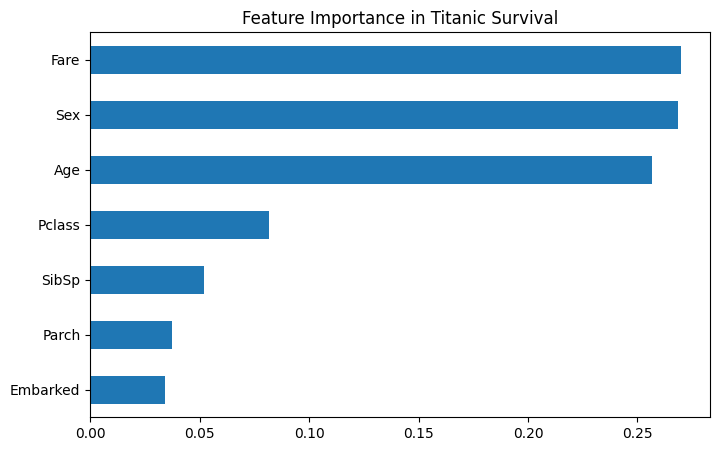

In [8]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

# Feature importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance in Titanic Survival")
plt.show()



In [9]:
# Example new passenger data
new_passenger = pd.DataFrame({
    "Pclass": [3],
    "Sex": [1],        # female = 1, male = 0
    "Age": [25],
    "SibSp": [0],
    "Parch": [0],
    "Fare": [7.25],
    "Embarked": [0]    # S=0, C=1, Q=2
})

# Prediction
prediction = rf_model.predict(new_passenger)

print("Prediction:", "Survived ✅" if prediction[0]==1 else "Not Survived ❌")



Prediction: Survived ✅


In [10]:
import ipywidgets as widgets
from IPython.display import display

# Widgets
pclass = widgets.Dropdown(options=[1,2,3], description="Class:")
sex = widgets.Dropdown(options=[("Male",0),("Female",1)], description="Sex:")
age = widgets.FloatSlider(min=0, max=80, step=1, description="Age:")
sibsp = widgets.IntSlider(min=0, max=10, description="SibSp:")
parch = widgets.IntSlider(min=0, max=10, description="Parch:")
fare = widgets.FloatSlider(min=0, max=600, step=1, description="Fare:")
embarked = widgets.Dropdown(options=[("Southampton",0),("Cherbourg",1),("Queenstown",2)], description="Embarked:")

button = widgets.Button(description="Predict Survival")

# Function
def on_button_click(b):
    new_passenger = pd.DataFrame({
        "Pclass": [pclass.value],
        "Sex": [sex.value],
        "Age": [age.value],
        "SibSp": [sibsp.value],
        "Parch": [parch.value],
        "Fare": [fare.value],
        "Embarked": [embarked.value]
    })
    prediction = rf_model.predict(new_passenger)
    result = "✅ Survived" if prediction[0]==1 else "❌ Not Survived"
    print("Prediction:", result)

button.on_click(on_button_click)

# Show form
display(pclass, sex, age, sibsp, parch, fare, embarked, button)


Dropdown(description='Class:', options=(1, 2, 3), value=1)

Dropdown(description='Sex:', options=(('Male', 0), ('Female', 1)), value=0)

FloatSlider(value=0.0, description='Age:', max=80.0, step=1.0)

IntSlider(value=0, description='SibSp:', max=10)

IntSlider(value=0, description='Parch:', max=10)

FloatSlider(value=0.0, description='Fare:', max=600.0, step=1.0)

Dropdown(description='Embarked:', options=(('Southampton', 0), ('Cherbourg', 1), ('Queenstown', 2)), value=0)

Button(description='Predict Survival', style=ButtonStyle())

Prediction: ❌ Not Survived
